In [1]:
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
#from sklearn.preprocessing import OneHotEncode
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator	

In [2]:
def load_images(image_path):
    files = np.array(os.listdir(image_path))
    images = []
    for image in tqdm(files):
        image = cv2.imread(image_path + image)
        image = cv2.resize(image, dsize=(200,200))
        images.append(image)
        
    images = np.array(images)
    
    return images

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
norm_train = load_images('/content/drive/MyDrive/AI/train/Normal/')
pneu_train = load_images('/content/drive/MyDrive/AI/train/Pneumonia/')

norm_test = load_images('/content/drive/MyDrive/AI/test/Normal/')
pneu_test = load_images('/content/drive/MyDrive/AI/test/Pneumonia/')

100%|██████████| 389/389 [00:06<00:00, 56.93it/s]


In [ ]:
norm_train.shape

(1349, 200, 200, 3)

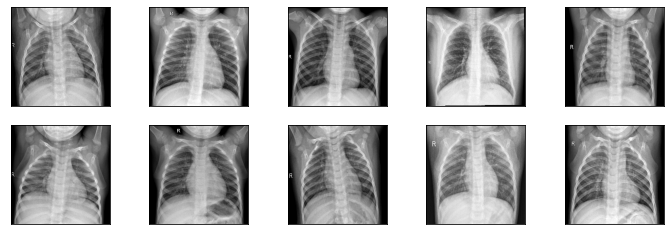

In [ ]:
from numpy.core.multiarray import shares_memory
ig, axes = plt.subplots(ncols=5, nrows=2, sharex = False, sharey = True, figsize=(12, 4))

count = 10
for i in range(2):
  for j in range(5):
    axes[i,j].imshow(norm_train[count])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    count += 1
plt.show()

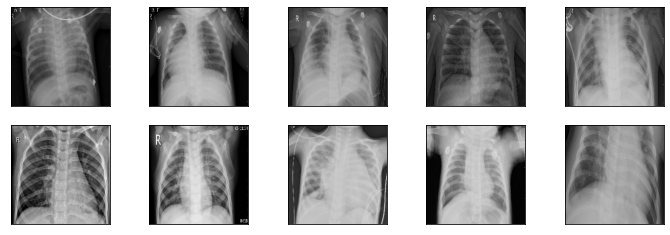

In [ ]:
from numpy.core.multiarray import shares_memory
ig, axes = plt.subplots(ncols=5, nrows=2, sharex = False, sharey = True, figsize=(12, 4))

count = 10
for i in range(2):
  for j in range(5):
    axes[i,j].imshow(pneu_train[count])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    count += 1
plt.show()

In [ ]:
X_train = np.vstack((norm_train, pneu_train))
X_test = np.vstack((norm_test, pneu_test))

In [ ]:
X_train.shape

(5232, 200, 200, 3)

In [ ]:
X_test.shape

(623, 200, 200, 3)

In [ ]:
y_train = np.append([0] * norm_train.shape[0], [1] * pneu_train.shape[0])
y_test = np.append([0] * norm_test.shape[0], [1] * pneu_test.shape[0])


In [ ]:
y_train.shape

(5232,)

In [ ]:
y_test.shape

(623,)

In [ ]:
train = np.array(list(zip(X_train, y_train)))
test = np.array(list(zip(X_test, y_test)))

np.random.shuffle(train)
np.random.shuffle(test)

X_train, y_train = zip(*train)
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test, y_test = zip(*test)
X_test = np.array(X_test)
y_test = np.array(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 10,  
        zoom_range = 0.1, 
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

In [ ]:
datagen.fit(X_train)

CNN

In [ ]:
input1 = Input(shape=(200,200,3))

cnn = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same')(input1)
cnn = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same')(cnn)
cnn = MaxPool2D((2, 2))(cnn)

cnn = Flatten()(cnn)
cnn = Dropout(0.5)(cnn)
cnn = Dense(100, activation='relu')(cnn)
cnn = Dropout(0.5)(cnn)
cnn = Dense(50, activation='relu')(cnn)
output1 = Dense(1, activation='sigmoid')(cnn)

model = Model(inputs=input1, outputs=output1)
model.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 320000)            0         
                                                                 
 dropout (Dropout)           (None, 320000)            0         
                                                             

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['acc'])

In [ ]:
checkpoint = ModelCheckpoint('model.h5', monitor= 'val_acc', mode = 'max', verbose= 1, save_best_only= True, save_freq=1)

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs=30, shuffle = True, validation_data=(X_test, y_test), callbacks = [checkpoint])


Epoch 1/30
164/164 [==============================] - 59s 279ms/step - loss: 41.1516 - acc: 0.7563 - val_loss: 0.9191 - val_acc: 0.7352
Epoch 2/30
164/164 [==============================] - 46s 280ms/step - loss: 0.3824 - acc: 0.8232 - val_loss: 1.0167 - val_acc: 0.7544
Epoch 3/30
164/164 [==============================] - 46s 281ms/step - loss: 0.3215 - acc: 0.8532 - val_loss: 0.9446 - val_acc: 0.7544
Epoch 4/30
164/164 [==============================] - 47s 284ms/step - loss: 0.3494 - acc: 0.8429 - val_loss: 0.8863 - val_acc: 0.7817
Epoch 5/30
164/164 [==============================] - 49s 296ms/step - loss: 0.3399 - acc: 0.8591 - val_loss: 0.9179 - val_acc: 0.8042
Epoch 6/30
164/164 [==============================] - 47s 289ms/step - loss: 0.3107 - acc: 0.8716 - val_loss: 1.0375 - val_acc: 0.7480
Epoch 7/30
164/164 [==============================] - 48s 293ms/step - loss: 0.3107 - acc: 0.8698 - val_loss: 1.0544 - val_acc: 0.6998
Epoch 8/30
164/164 [==============================] - 

In [ ]:
model.save('../content/drive/MyDrive/AI/data_train_2')

INFO:tensorflow:Assets written to: ../content/drive/MyDrive/AI/data_train_2/assets


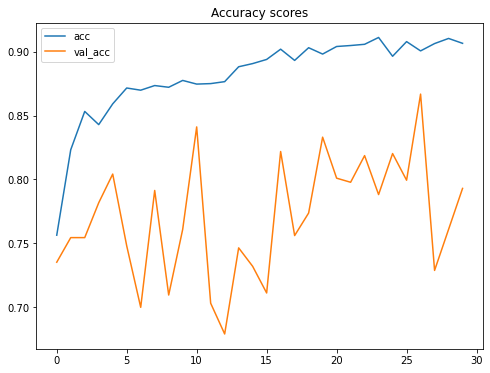

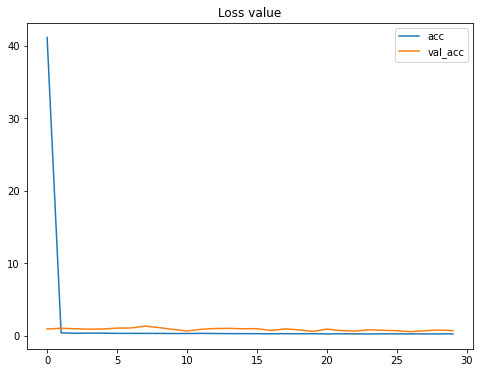

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.show()

plt.figure(figsize=(8,6))
plt.title('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['acc', 'val_acc'])
plt.show()

In [ ]:
model=load_model('../content/drive/MyDrive/AI/data_train_2')

In [ ]:
def matrix(image_to_predict, actual_labels):
  test_predictions = np.round(model.predict(image_to_predict))

  cm = confusion_matrix(actual_labels, test_predictions)

  plt.figure(figsize=(8,8))
  plt.title('Confusion matrix')
  sns.heatmap(cm, cbar=False, fmt='d', annot=True, cmap=plt.cm.Blues)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

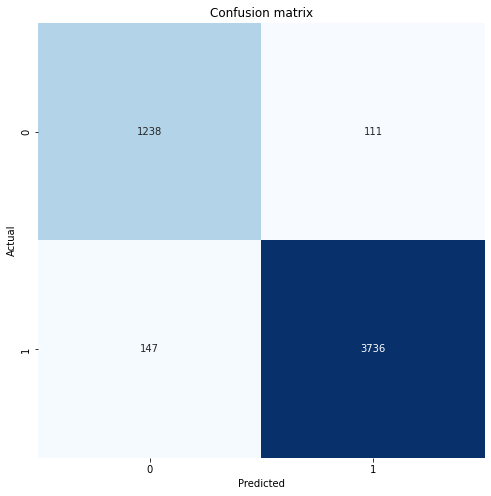

In [ ]:
matrix(X_train, y_train)

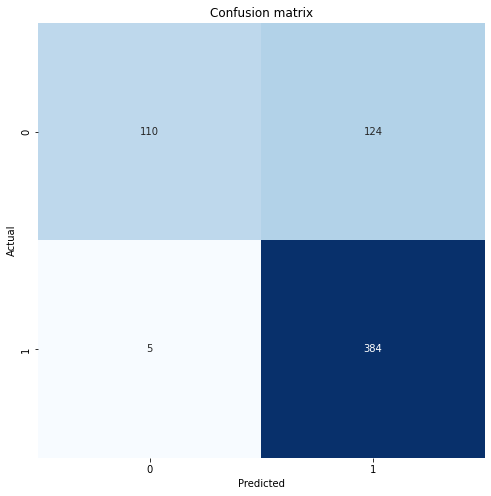

In [ ]:
matrix(X_test, y_test)

In [ ]:
norm_images_val = load_images('/content/drive/MyDrive/AI/val/Normal/')

pneu_images_val = load_images('/content/drive/MyDrive/AI/val/Pneumonia/')

100%|██████████| 8/8 [00:01<00:00,  4.51it/s]


In [ ]:
norm_pred_val = np.round(model.predict(norm_images_val))
pneu_pred_val = np.round(model.predict(pneu_images_val))

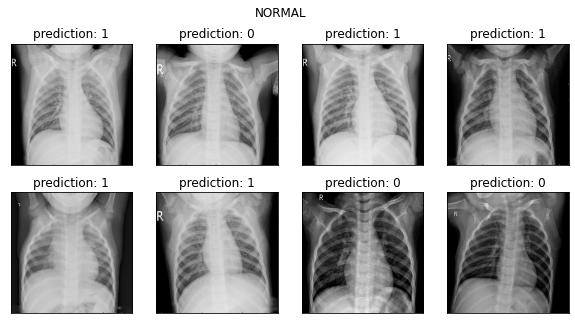

In [ ]:
ig, axes = plt.subplots(ncols=4, nrows=2, sharex=False, sharey = True, figsize=(10, 5))
plt.suptitle('NORMAL')
counter = 0
for i in range(2):
    for j in range(4):
        axes[i,j].set_title('prediction: ' + str(int(norm_pred_val[counter][0])))
        axes[i,j].imshow(norm_images_val[counter], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        counter += 1
plt.show()

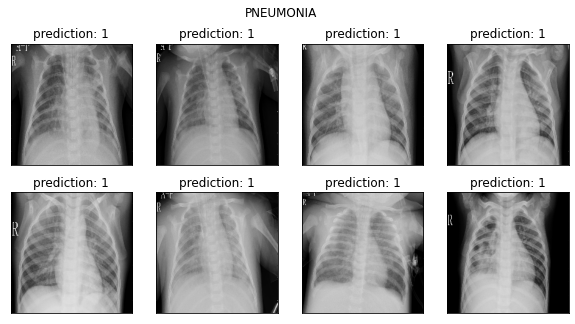

In [ ]:
ig, axes = plt.subplots(ncols=4, nrows=2, sharex=False, sharey = True, figsize=(10, 5))
plt.suptitle('PNEUMONIA')
counter = 0
for i in range(2):
    for j in range(4):
        axes[i,j].set_title('prediction: ' + str(int(pneu_pred_val[counter][0])))
        axes[i,j].imshow(pneu_images_val[counter], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        counter += 1
plt.show()